Timajo, Kurt Vincent
CpE-3B

## Challenge

### Apply PCA on the Movie dataset (use all the features available), then use this to predict whether a movie will have low sales, average sales, or high sales.

### Load dataset and separate the features from labels

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

mvds_raw = pd.read_csv('movie_metadata.csv')
mvds_raw = mvds_raw.replace('?',0)
mvds_raw

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,-1,-1,131,-1,Rob Walker,131,-1,Documentary,...,-1,-1,-1,-1,-1,-1,12,7.1,-1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,-1,Comedy|Drama,...,6,English,Canada,-1,-1,2013,470,7.7,-1.00,84
5039,Color,-1,43,43,-1,319,Valorie Curry,841,-1,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,-1,-1,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,-1,Drama|Horror|Thriller,...,3,English,USA,-1,1400,2013,0,6.3,-1.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,-1,2012,719,6.3,2.35,660


### Pre-process the dataset (normalization, standardization of data etc.)


In [20]:
target = "gross"
int_value = -1

low_condition = (mvds_raw["gross"] / mvds_raw["budget"] > -1) & (mvds_raw["gross"] / mvds_raw["budget"] < 2.9)
ave_condition = (mvds_raw["gross"] / mvds_raw["budget"] > 3.0) & (mvds_raw["gross"] / mvds_raw["budget"] < 4.9)
high_condition = (mvds_raw["gross"] / mvds_raw["budget"] > 5.0)

mvds_raw["gross"][low_condition] = 1 # low
mvds_raw["gross"][ave_condition] = 2 # average
mvds_raw["gross"][high_condition] = 3 # high

y = mvds_raw[target]
X = mvds_raw.drop(columns=["color","plot_keywords","movie_imdb_link","content_rating", "gross", "director_name", "actor_1_name", "actor_2_name",  "actor_3_name","movie_title", "language", "country", "genres"], axis=1)
y = pd.Categorical(y).codes
print('Features: \n', X)
print('Labels: \n', y)
y


Features: 
       num_critic_for_reviews  duration  director_facebook_likes  \
0                        723       178                        0   
1                        302       169                      563   
2                        602       148                        0   
3                        813       164                    22000   
4                         -1        -1                      131   
...                      ...       ...                      ...   
5038                       1        87                        2   
5039                      43        43                       -1   
5040                      13        76                        0   
5041                      14       100                        0   
5042                      43        90                       16   

      actor_3_facebook_likes  actor_1_facebook_likes  num_voted_users  \
0                        855                    1000           886204   
1                       1000         

C:\Users\djkur\AppData\Local\Temp\ipykernel_12520\46097883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvds_raw["gross"][low_condition] = 1 # low
C:\Users\djkur\AppData\Local\Temp\ipykernel_12520\46097883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvds_raw["gross"][ave_condition] = 2 # average
C:\Users\djkur\AppData\Local\Temp\ipykernel_12520\46097883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvds_raw["gross

array([ 1,  0,  0, ...,  0, 14,  2], dtype=int16)

### Implement PCA on the data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=3)
X_sklearn = sklearn_pca.fit_transform(X)

X_train_3, X_test_3, y_train, y_test = train_test_split(X_sklearn, y, test_size=0.3)
X_sklearn

array([[ 2.01125733e+08,  7.88616876e+05, -4.42487570e+04],
       [ 2.64125708e+08,  3.71203246e+05,  3.09756030e+04],
       [ 2.09125696e+08,  1.84474085e+05,  1.40865313e+03],
       ...,
       [-3.58729211e+07, -8.21547456e+04, -8.25478206e+03],
       [-3.58743220e+07, -8.07811333e+04, -5.76249774e+03],
       [-3.58732208e+07, -7.78823695e+04, -8.23990987e+03]])

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(1, figsize=(10,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1])
for out, lab, col in zip((1,2,3), ('Low', 'Average','High'),
                        ('red', 'blue','green')):
    ax.scatter(X_train_3[y_train == out, 0],
               X_train_3[y_train == out, 1],
               X_train_3[y_train == out, 2],
                label = lab,
                c=col)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)
ax.set_zlabel("Principal Component 3", fontsize=14)
ax.legend(loc='best', fontsize=14)


<Figure size 1000x600 with 0 Axes>

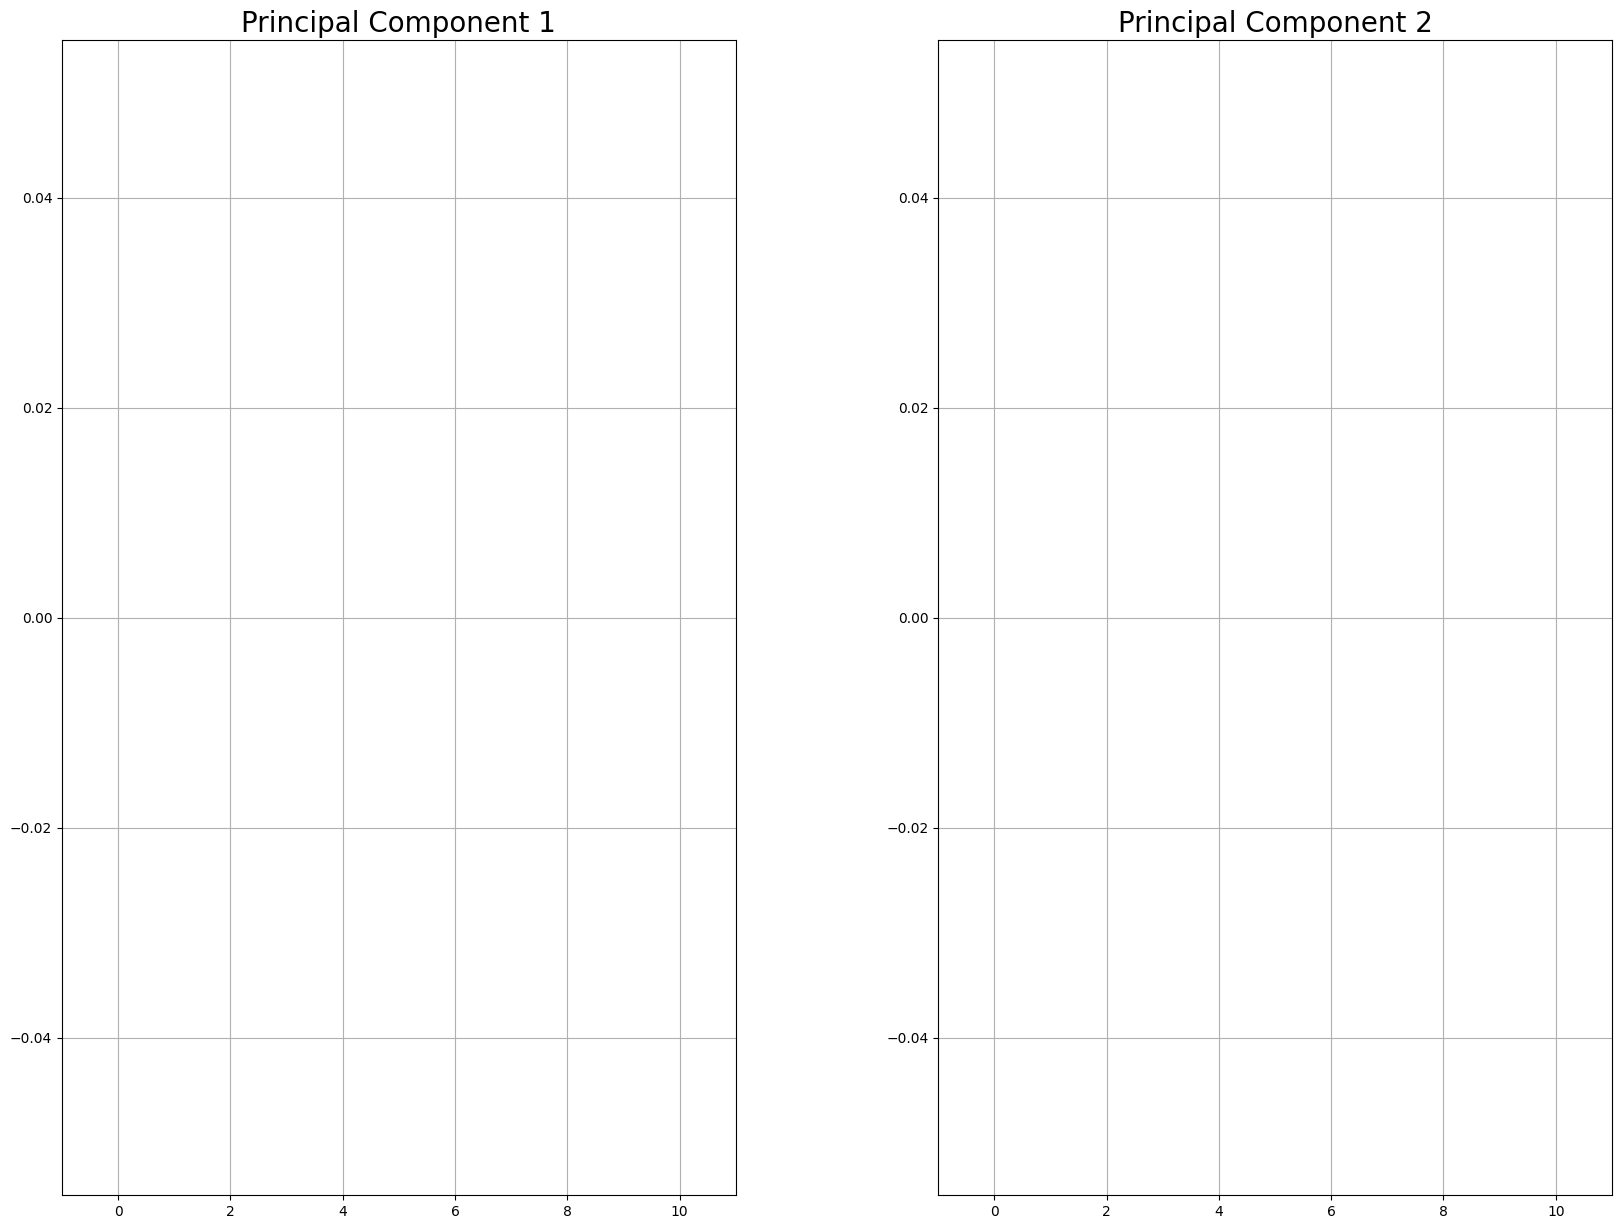

In [23]:
feat_for_clus_names = [ "Principal Component 1",
                        "Principal Component 2"]

num_of_components = 2
sklearn_pca = sklearnPCA(n_components=num_of_components)
X_sklearn = sklearn_pca.fit_transform(X)
X_train_2, X_test_2, y_train, y_test = train_test_split(X_sklearn, y, test_size=0.3)

# Histogram of 2 the features
df = pd.DataFrame(X_train_2, range(X_train_2.shape[0]), columns = feat_for_clus_names)
bins = range(11)
for array in df.hist(bins=np.arange(10)-0.5, figsize=(20,15)):
    for subplot in array:
        subplot.set_xlim((-1,11))
        subplot.title.set_fontsize(20)

### Choose a supervised learning algorithm to create a model



In [24]:
from sklearn import linear_model, utils, metrics

#train the model
logres = linear_model.LogisticRegression()
X_train_3.shape
logres.fit(X_train_3, y_train)

### Evaluate the performance of the model

In [ ]:
y_pred_log = logres.predict(X_test_3)
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1234
           1       0.07      0.16      0.10        89
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          51       0.00    

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Rec